In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('ecom-data.xlsx')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


# Preprocessing and EDA

# 1. Missing Values

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
#Listing all columns with null values
features_with_na=[features for features in df.columns if df[features].isna().sum()>0]
features_with_na

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [8]:
df[features_with_na].nunique()

Tenure                         36
WarehouseToHome                34
HourSpendOnApp                  6
OrderAmountHikeFromlastYear    16
CouponUsed                     17
OrderCount                     16
DaySinceLastOrder              22
dtype: int64

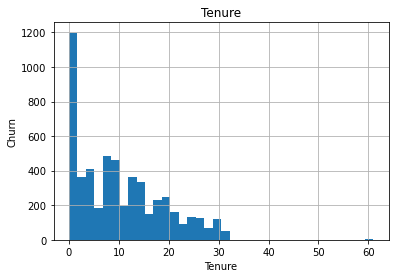

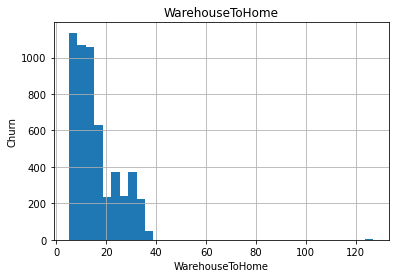

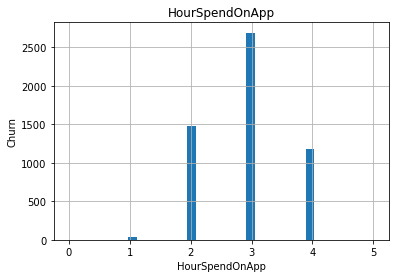

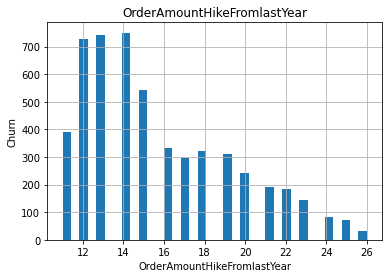

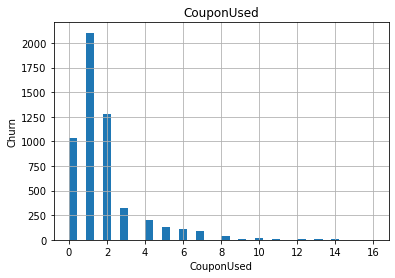

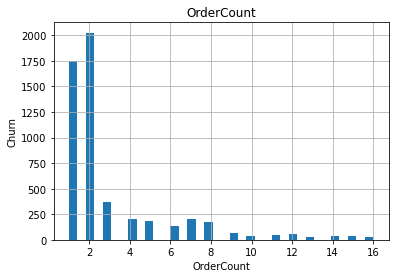

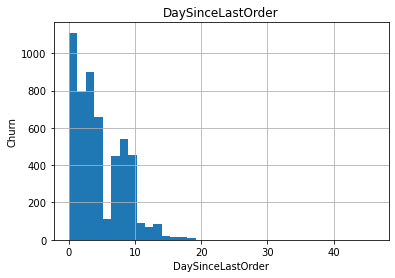

In [9]:
for features in features_with_na:
    data =df.copy()
    data[features].hist(bins=36)
    plt.xlabel(features)
    plt.ylabel('Churn')
    plt.title(features)
    plt.show()

In [10]:
df[features_with_na].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.751023,1.894621,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0


    Inference
    Columns with missing values are not normally distributed. That is, they are skewed.
    Also, mean and median are almost same for them.
    Therefore, we replace the missing values with median.

In [11]:
for features in features_with_na:
    df[features]=df[features].fillna(df[features].median())
    
df[features_with_na].isna().sum()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

In [12]:
df[features_with_na].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.0,9.0,15.0,61.0
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.0,15.0,18.0,26.0
CouponUsed,5630.0,1.716874,1.857640,0.0,1.0,1.0,2.0,16.0
OrderCount,5630.0,2.961812,2.879248,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.0,3.0,7.0,46.0


# 2.Handling Outliers

In [13]:
#Separating numerical features excluding 'CustomerID','Churn' and 'CityTier', since they are unique.
numerical_features=[feature for feature in df.columns if df[feature].dtype!=object and feature not in ['CustomerID','Churn','CityTier']]
numerical_features

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [14]:
df[numerical_features].nunique()

Tenure                           36
WarehouseToHome                  34
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
SatisfactionScore                 5
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

# EDA 1. Univariate Analysis

    Since outliers in this dataset are not illogical, we may do EDA before handling outliers.  

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>],
       [<AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>],
       [<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>],
       [<AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>]], dtype=object)

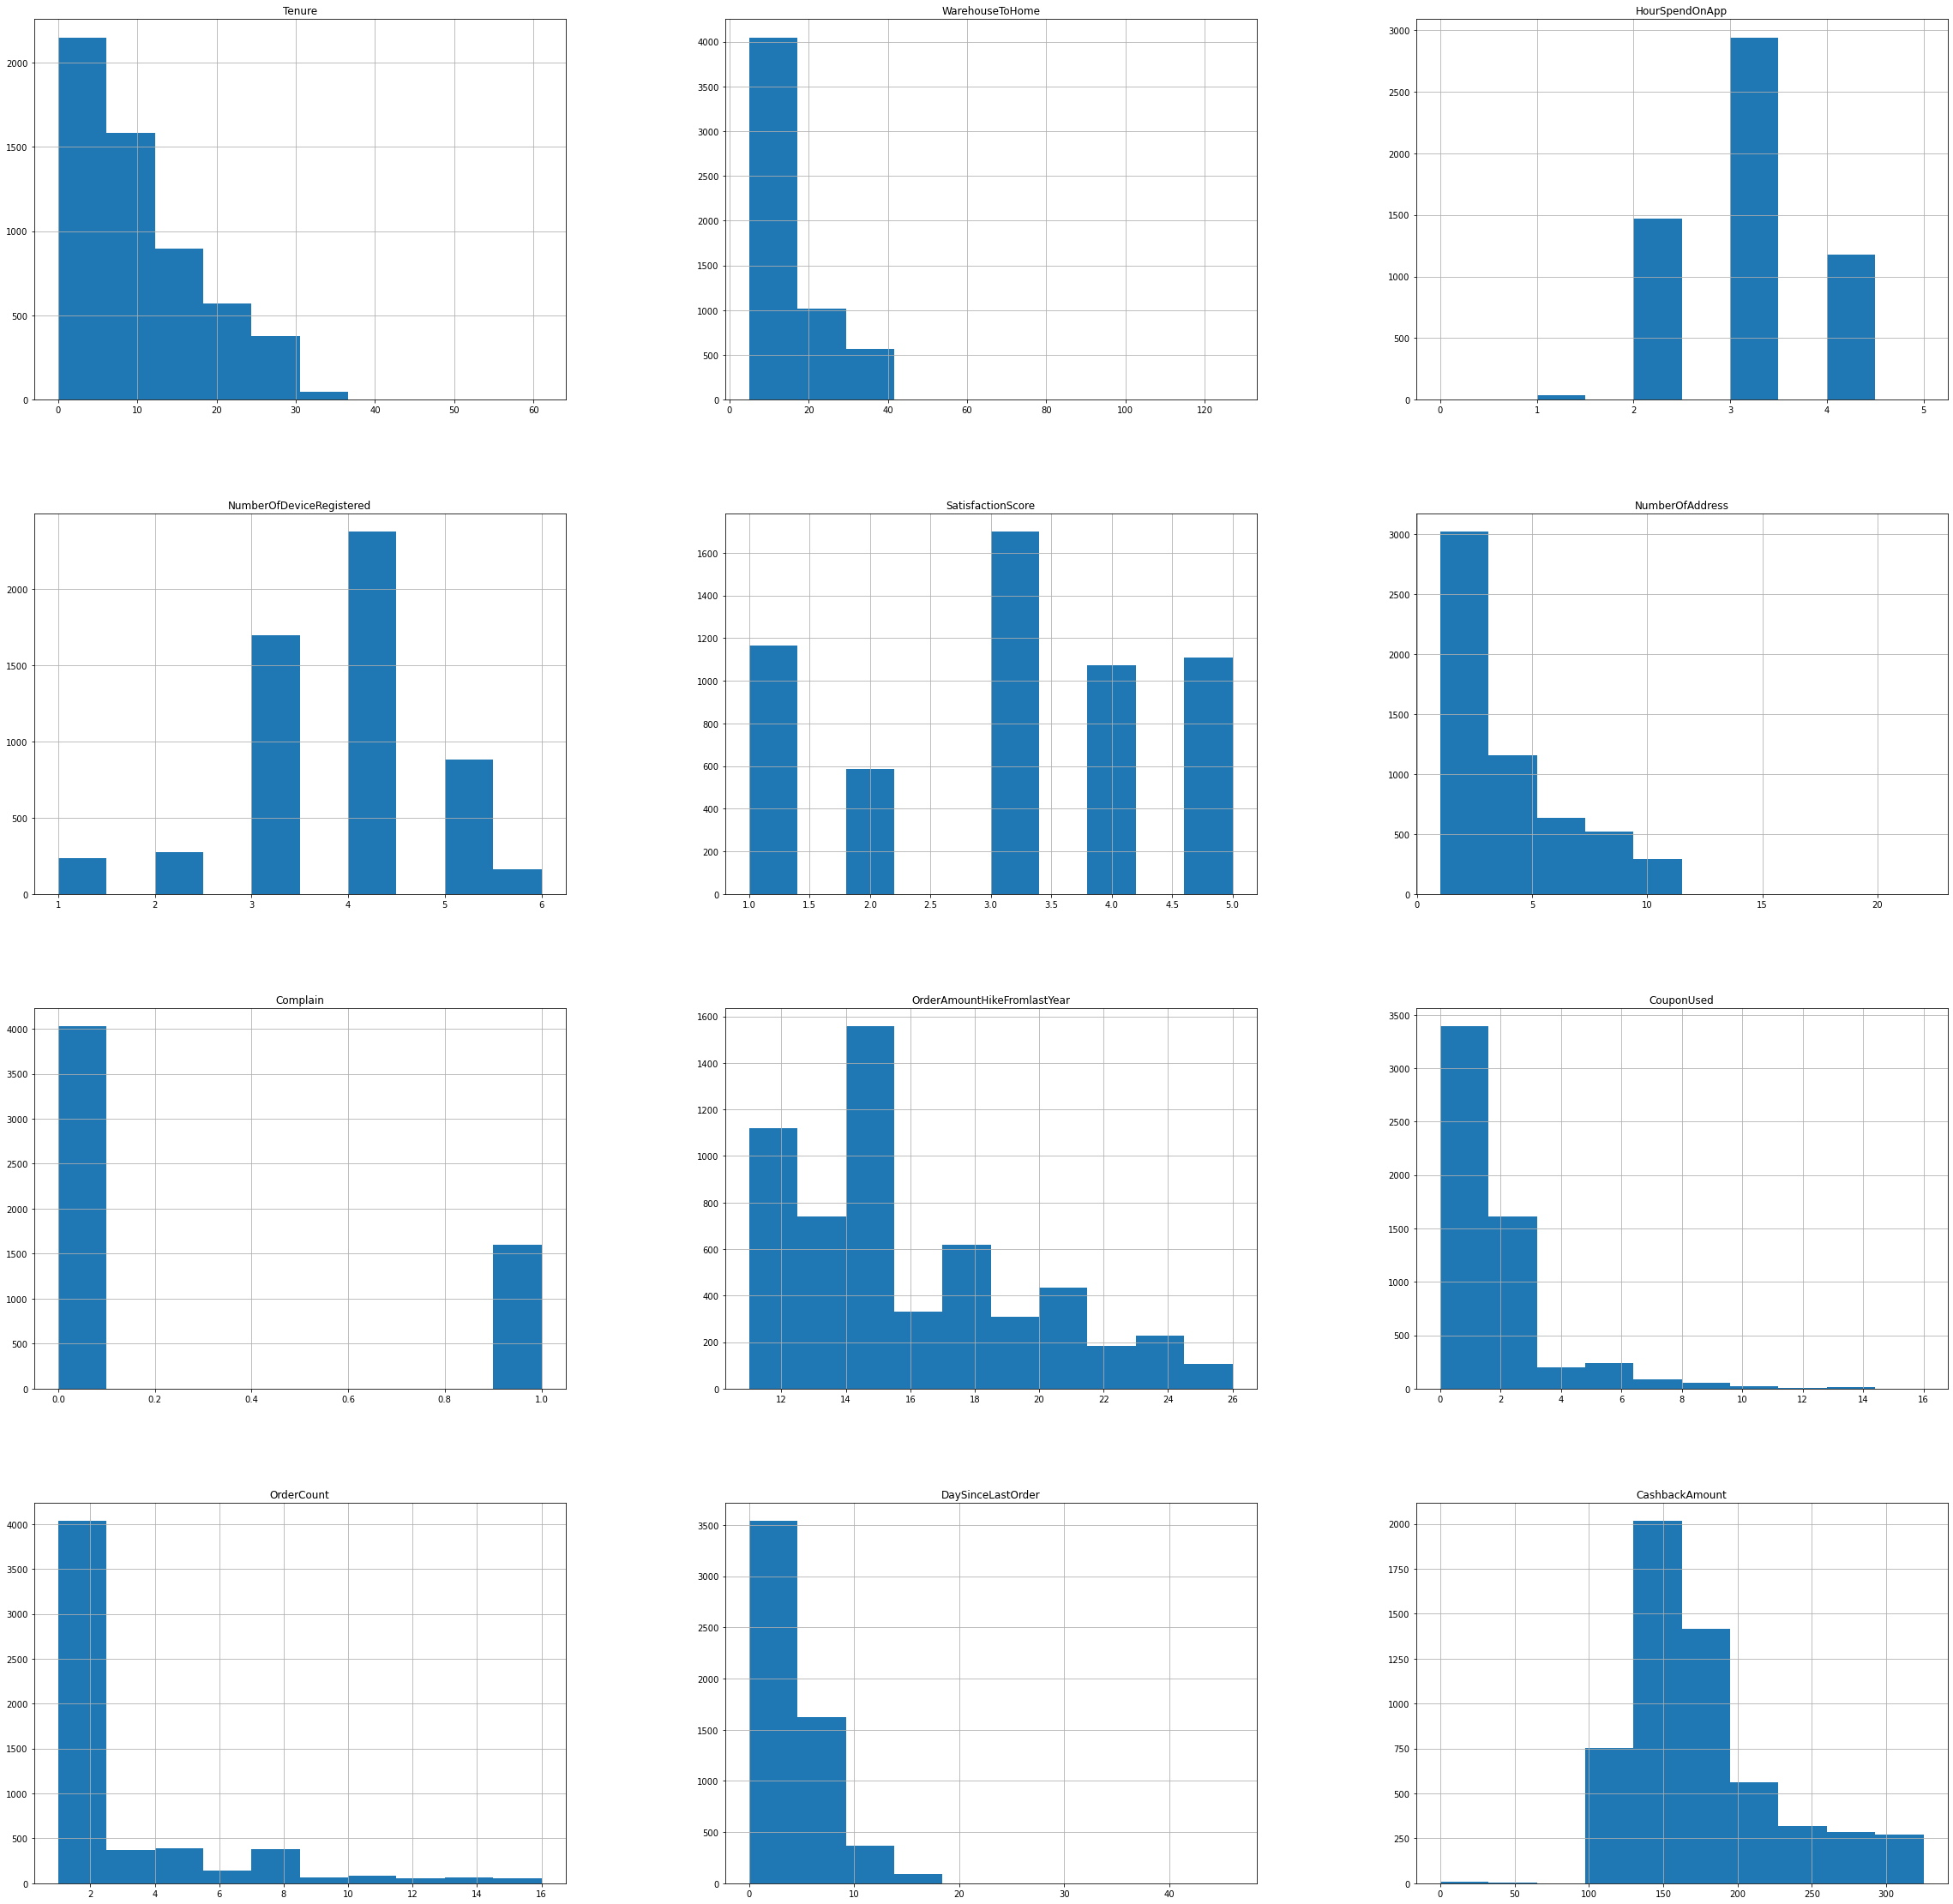

In [15]:
   df[numerical_features].hist(figsize=(40,40))

In [16]:
cat_features=[features for features in df.columns if features not in (numerical_features and ['CustomerID','Tenure','CashbackAmount'])]

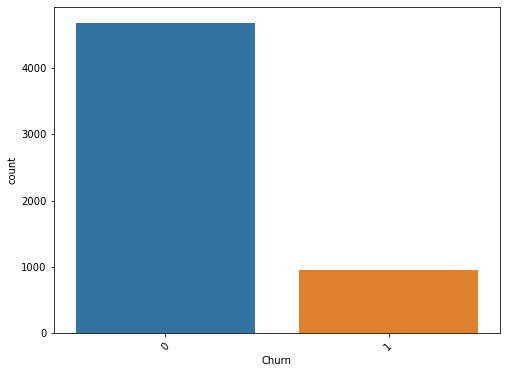

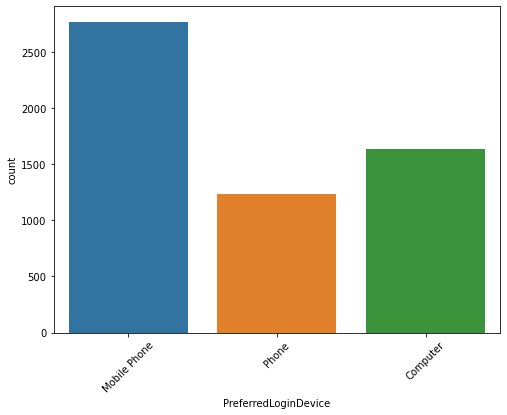

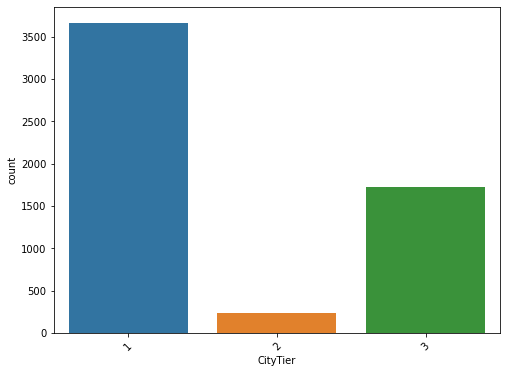

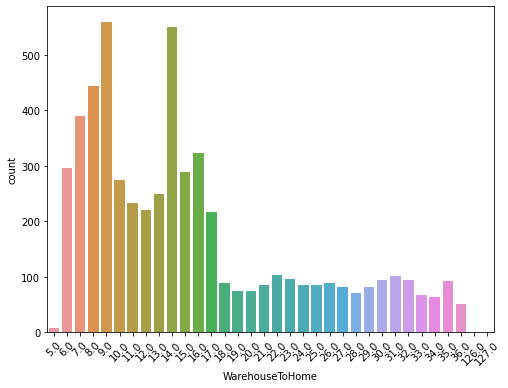

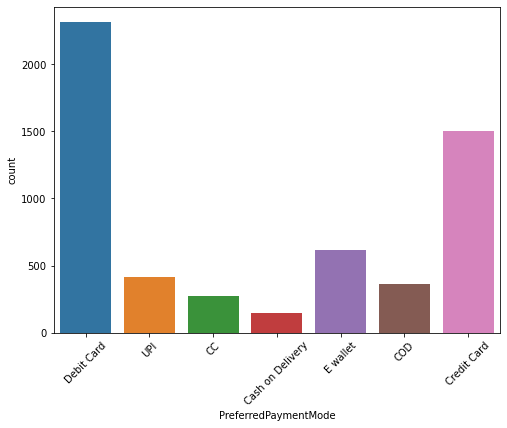

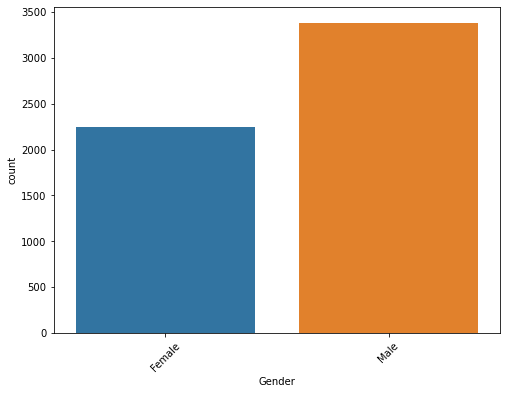

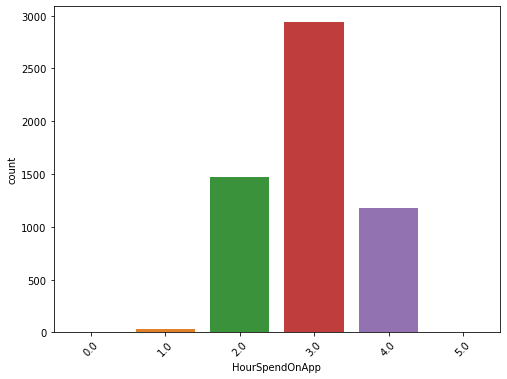

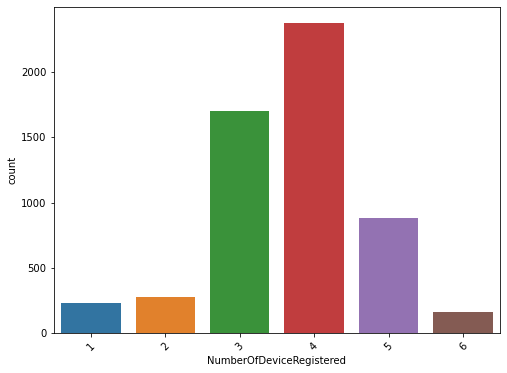

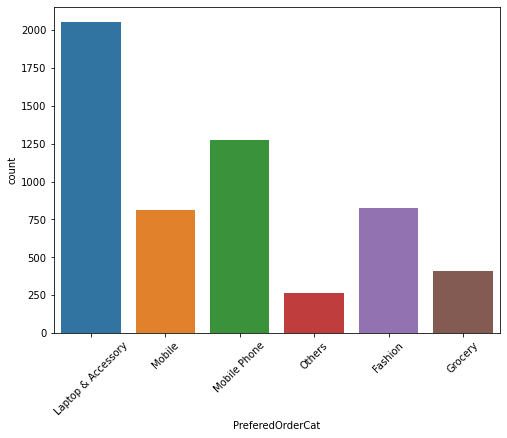

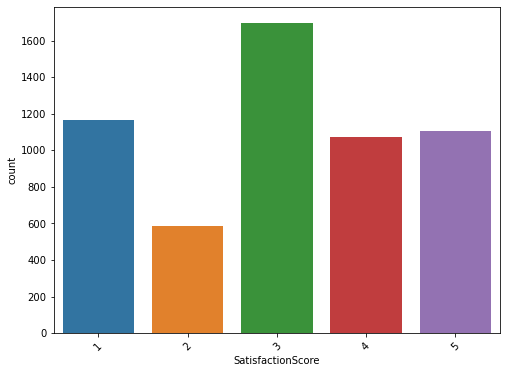

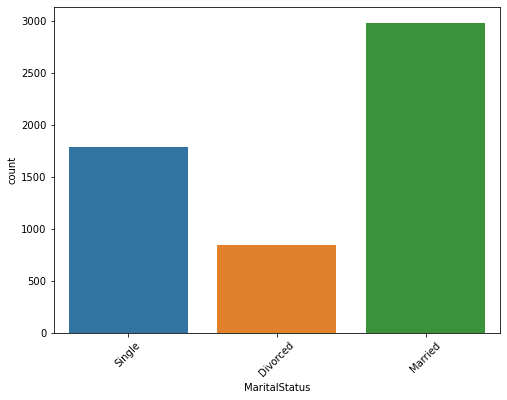

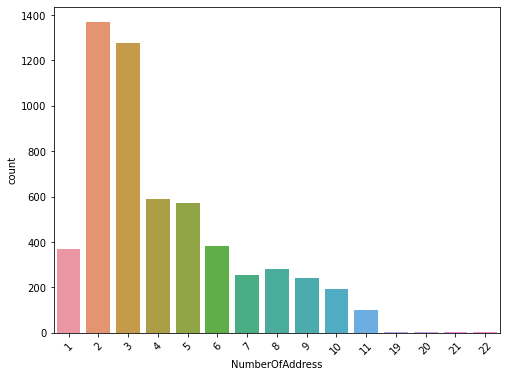

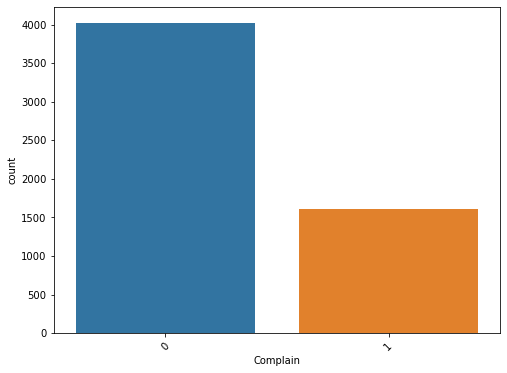

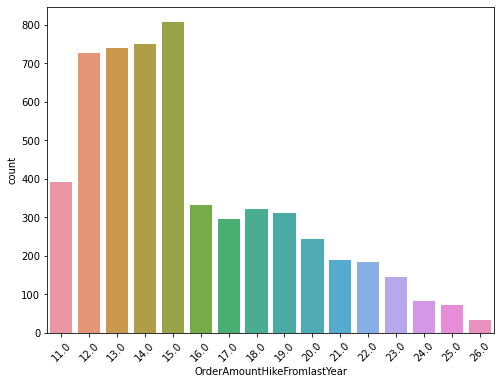

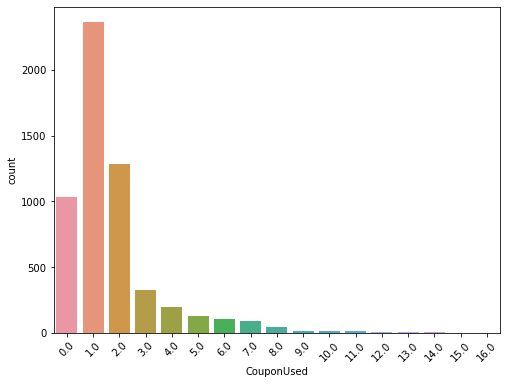

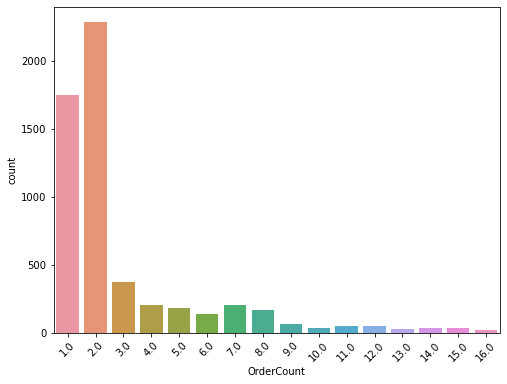

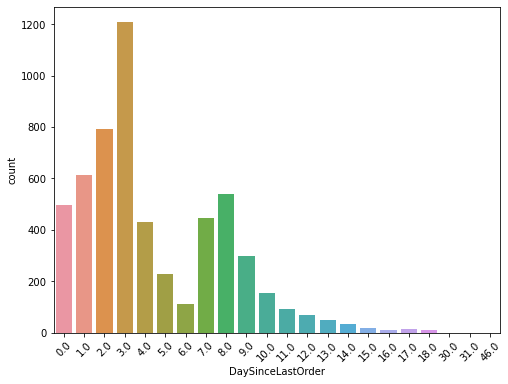

In [17]:
for feature in cat_features:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=feature, data=df)
    plt.xticks(rotation=45)
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


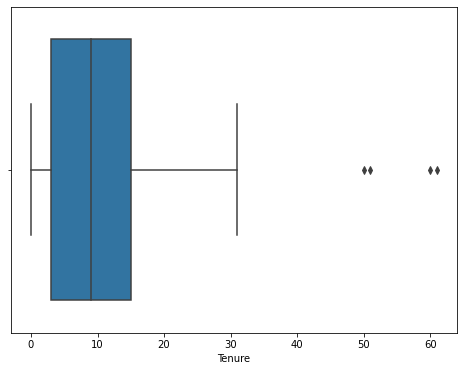

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


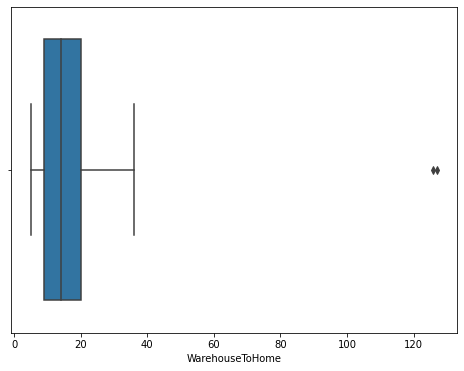

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


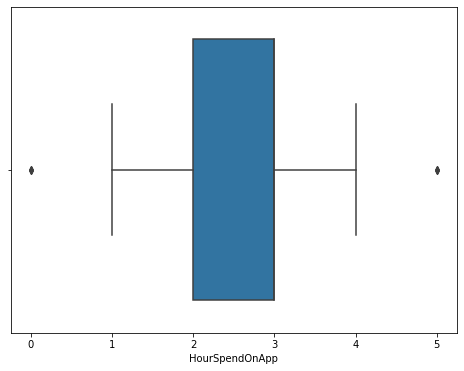

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


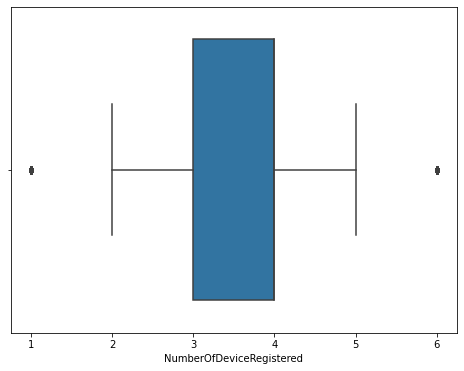

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


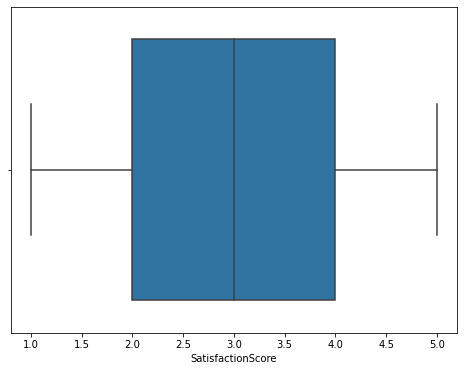

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


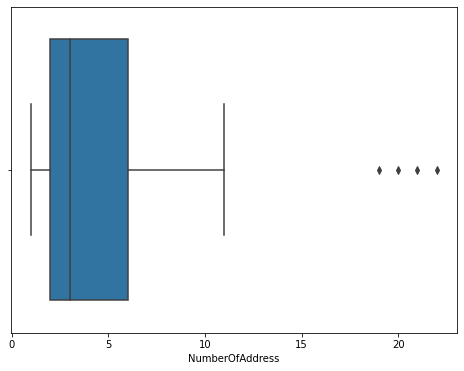

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


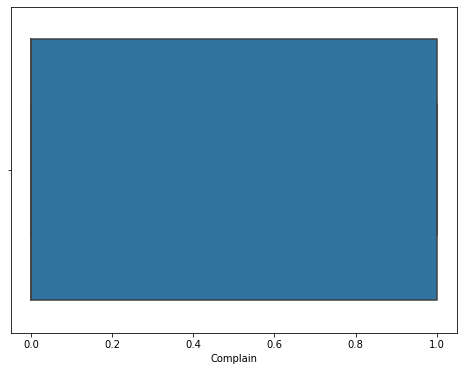

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


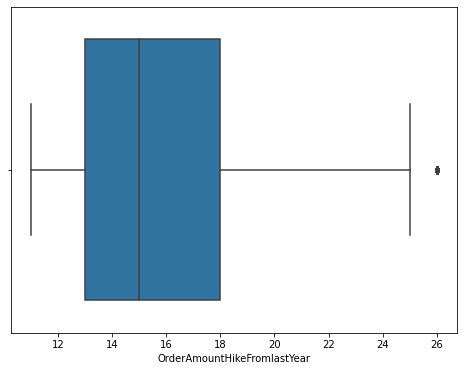

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


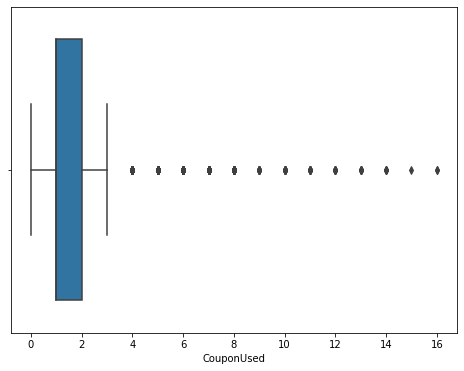

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


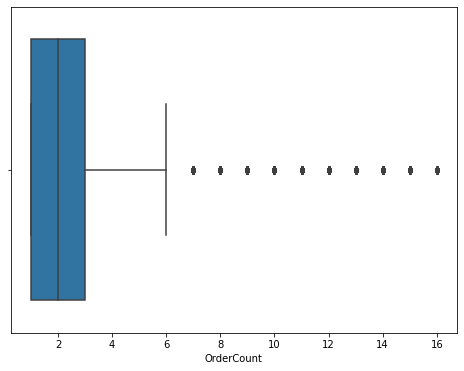

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


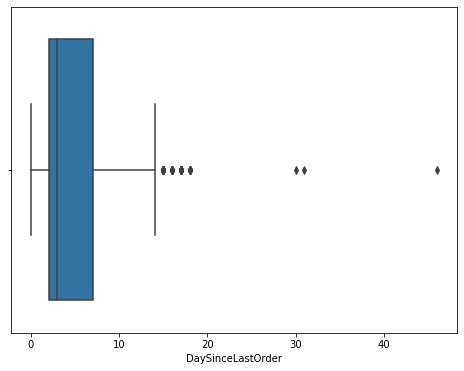

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


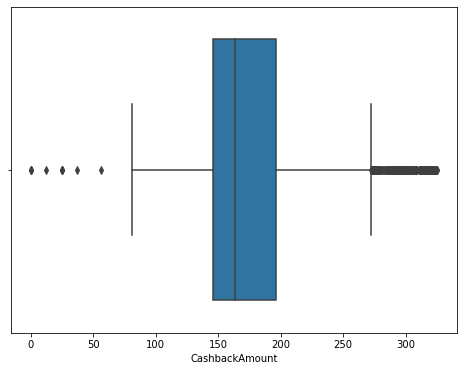

In [18]:
#Checking for outliers in these numerical columns
for features in numerical_features:
    data =df.copy()
    plt.figure(figsize=(8,6))
    sns.boxplot(df[features])
    plt.xlabel(features)
    plt.show()

    There are outliers in almost all numerical columns. 
    Since, the number of outliers is large for some columns, we replace them with corresponding upper or lower limits.

In [19]:
df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00


In [20]:
def remove_outliers(feature):
    Q1 = np.percentile(df[feature],25,interpolation = 'midpoint')
    Q2 = np.percentile(df[feature],50,interpolation = 'midpoint')
    Q3 = np.percentile(df[feature],75,interpolation = 'midpoint')

    IQR = Q3-Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    outlier = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier.append(x)
    print(feature)
    print('No:of outliers before: ',len(outlier))

    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])
    outlier2 = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier2.append(x)
    print('No:of outliers after: ',len(outlier2))

    
for feature in numerical_features:
    remove_outliers(feature)


Tenure
No:of outliers before:  4
No:of outliers after:  0
WarehouseToHome
No:of outliers before:  2
No:of outliers after:  0
HourSpendOnApp
No:of outliers before:  6
No:of outliers after:  0
NumberOfDeviceRegistered
No:of outliers before:  397
No:of outliers after:  0
SatisfactionScore
No:of outliers before:  0
No:of outliers after:  0
NumberOfAddress
No:of outliers before:  4
No:of outliers after:  0
Complain
No:of outliers before:  0
No:of outliers after:  0
OrderAmountHikeFromlastYear
No:of outliers before:  33
No:of outliers after:  0
CouponUsed
No:of outliers before:  629
No:of outliers after:  0
OrderCount
No:of outliers before:  703
No:of outliers after:  0
DaySinceLastOrder
No:of outliers before:  62
No:of outliers after:  0
CashbackAmount
No:of outliers before:  440
No:of outliers after:  0


In [21]:
df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.0000,3.00,9.00,15.0000,33.0000
WarehouseToHome,5630.0,15.534813,8.089328,5.0000,9.00,14.00,20.0000,36.5000
HourSpendOnApp,5630.0,2.934636,0.703826,0.5000,2.00,3.00,3.0000,4.5000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.5000,3.00,4.00,4.0000,5.5000
SatisfactionScore,5630.0,3.066785,1.380194,1.0000,2.00,3.00,4.0000,5.0000
NumberOfAddress,5630.0,4.207993,2.555111,1.0000,2.00,3.00,6.0000,12.0000
Complain,5630.0,0.284902,0.451408,0.0000,0.00,0.00,1.0000,1.0000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.0000,13.00,15.00,18.0000,25.5000
CouponUsed,5630.0,1.440409,1.071295,0.0000,1.00,1.00,2.0000,3.5000
OrderCount,5630.0,2.520604,1.711109,1.0000,1.00,2.00,3.0000,6.0000


# 3. Encoding

In [22]:
df.select_dtypes(include=object).nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

    Since 'PreferredLoginDevice','Gender' and 'MaritalStatus' columns are neither ordinal nor having more number of 
    unique values, we encode them using one-hot encoding. And 'PreferredPaymentMode' and 'PreferedOrderCat' columns 
    are encoded using label encoding since, one-hot may introduce more number of columns.

# Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PreferredPaymentMode']=le.fit_transform(df['PreferredPaymentMode'])
df['PreferedOrderCat']=le.fit_transform(df['PreferedOrderCat'])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,4,Female,3.0,3.0,2,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,6,Male,3.0,4.0,3,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,4,Male,2.0,4.0,3,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,4,Male,2.0,4.0,2,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,0,Male,3.0,3.0,3,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


# One-Hot Encoding

In [24]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice','Gender','MaritalStatus'])
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,4,3.0,3.0,2,2.0,...,5.0,159.93,0,1,0,1,0,0,0,1
1,50002,1,9.0,1,8.0,6,3.0,4.0,3,3.0,...,0.0,120.90,0,0,1,0,1,0,0,1
2,50003,1,9.0,1,30.0,4,2.0,4.0,3,3.0,...,3.0,120.28,0,0,1,0,1,0,0,1
3,50004,1,0.0,3,15.0,4,2.0,4.0,2,5.0,...,3.0,134.07,0,0,1,0,1,0,0,1
4,50005,1,0.0,1,12.0,0,3.0,3.0,3,5.0,...,3.0,129.60,0,0,1,0,1,0,0,1


# 4. Feature Reduction

    Since CustomerID doesn't contribute to modelling or EDA, that can be removed.

In [25]:
df=df.drop(['CustomerID'], axis=1)

In [26]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,4,3.0,3.0,2,2.0,9.0,...,5.0,159.93,0,1,0,1,0,0,0,1
1,1,9.0,1,8.0,6,3.0,4.0,3,3.0,7.0,...,0.0,120.90,0,0,1,0,1,0,0,1
2,1,9.0,1,30.0,4,2.0,4.0,3,3.0,6.0,...,3.0,120.28,0,0,1,0,1,0,0,1
3,1,0.0,3,15.0,4,2.0,4.0,2,5.0,8.0,...,3.0,134.07,0,0,1,0,1,0,0,1
4,1,0.0,1,12.0,0,3.0,3.0,3,5.0,3.0,...,3.0,129.60,0,0,1,0,1,0,0,1


# 5. Standardization/Normalization

    Normalization using min-max scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
df_scaled = pd.DataFrame(min_max.fit_transform(df),columns = df.columns)

In [28]:
df_scaled.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.344828,0.444940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.000000,0.252161,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.206897,0.249099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.206897,0.317211,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.206897,0.295132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# 6. Feature Engineering

    Since the columns 'PreferredLoginDevice_Mobile Phone' and 'PreferredLoginDevice_Phone' are logically same, 
    we can merge them.

In [29]:
df=df_scaled
df['PreferredLoginDevice_Phone']=df['PreferredLoginDevice_Mobile Phone']+df['PreferredLoginDevice_Phone']

In [30]:
df_scaled.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.344828,0.444940,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.000000,0.252161,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.206897,0.249099,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.206897,0.317211,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.206897,0.295132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [31]:
df=df.drop(['PreferredLoginDevice_Mobile Phone'],axis=1)

In [32]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,...,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Phone,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.121212,1.0,0.031746,0.666667,0.625,0.375,0.4,0.25,0.727273,...,0.0,0.344828,0.444940,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.272727,0.0,0.095238,1.000000,0.625,0.625,0.6,0.50,0.545455,...,0.0,0.000000,0.252161,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.272727,0.0,0.793651,0.666667,0.375,0.625,0.6,0.50,0.454545,...,0.0,0.206897,0.249099,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000000,1.0,0.317460,0.666667,0.375,0.625,0.4,1.00,0.636364,...,0.0,0.206897,0.317211,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.222222,0.000000,0.625,0.375,0.6,1.00,0.181818,...,0.0,0.206897,0.295132,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'Gender_Female', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

<AxesSubplot:>

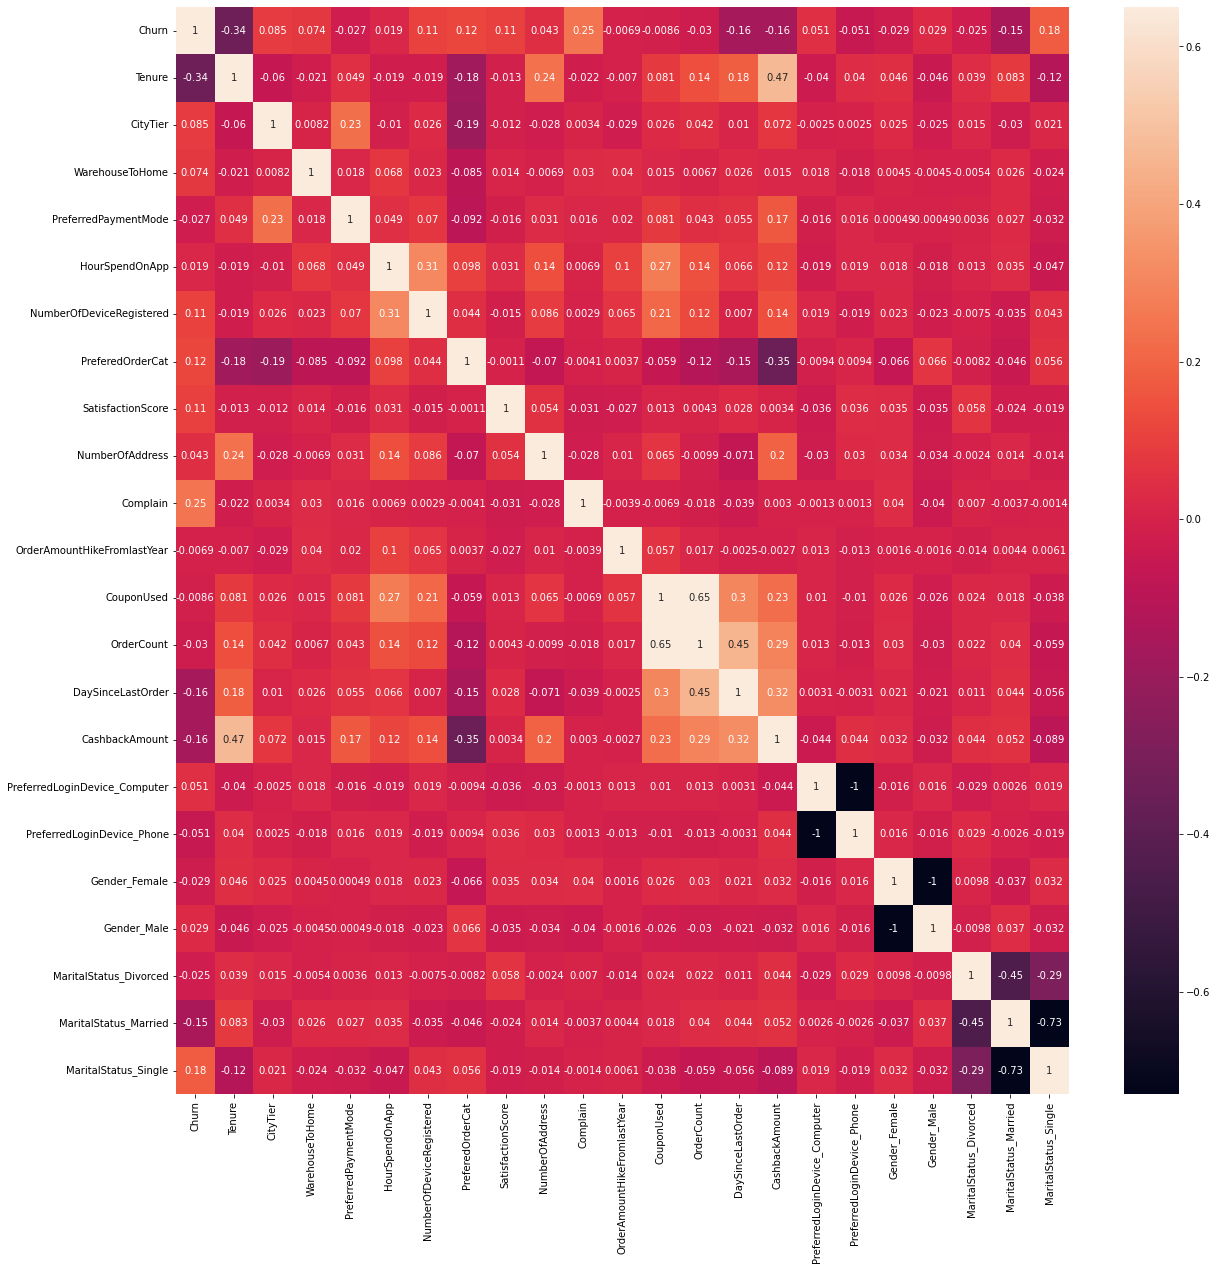

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmin=-0.73, vmax=0.65, annot=True)

    Since there are no strong positive or negative correlation between features. 
    Therefore, we can't remove any more features at this stage.